![](https://dev.aimped.ai/static/media/AimpedLogo.47cdb396fd70232c71e22e4baa7a22e1.svg)---

## Introduction

This tutorial will guide you through the process of using the Aimped library for relation extraction and importing the results into a Neo4j database. We'll cover installation, API setup, running the model, and storing the results in Neo4j.

## Prerequisites

- Python installed on your system
- Access to a Neo4j database instance
- Aimped API credentials

## Step 1: Installation and Setup

First, let's install the Aimped library:



<a target="_blank" href="https://colab.research.google.com/github/ai-amplified/models/blob/main/tutorials/Relation%20Extraction%20and%20Neo4j.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:

!pip install aimped==0.2.32 --quiet

import aimped
print(aimped.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 566.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.5/293.5 kB 4.3 MB/s eta 0:00:00
0.2.32


## Step 2: Setting up the Aimped API

Create an instance of the AimpedAPI class with your credentials:

In [2]:
from aimped.services.api import AimpedAPI

# Replace these values with your actual credentials and options
user_key = "1719878065_5rXXXXXXX"
user_secret = "vVSIRL5miTXdnRjUwT12ICcXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx"
options = {
    'base_url': 'https://dev.aimped.ai'
}

aimped_api = AimpedAPI(user_key, user_secret, options)


## Step 3: Defining a Callback Function (optional)

Create a callback function to handle events during the API call:

In [3]:
def callback(event, message, time, data=None):
    if event == 'start':
        print(f'Start event at {time}: {message}')
    elif event == 'proccess':
        print(f'Progress event at {time}: {message}')
    elif event == 'error':
        print(f'Error event at {time}: {message}')
    elif event == 'end':
        print(f'End event at {time}: {message}. Data: {data}')
    else:
        print(f'End event at {time}: {message}. Data: {data}')

## Step 4: Running the Relation Extraction Model

Set up the model parameters and run the model:

In [6]:
model_id = 298
payload = {
    "data_type": "data_json",
    "data_json": {
        "text": [
            "Following the identification of the tumor suppressor genes BRCA1 and BRCA2 and of the increase in breast cancer risk associated with mutations of these genes, several studies have examined the entity of this risk and the diagnostic and therapeutic procedures indicated to curtail the incidence of breast and ovarian cancer in this population."
        ],
        "entity": [
            "Tumor_Suppressor",
            "Oncogene",
            "Driver"
        ],
        "returnSvg": True, # Use False value for long text
        "model_name": "nlp-health-relation-cancer-genetics-base-en"
    }
}

result = aimped_api.run_model_callback(model_id, payload, callback)
print(result)

Start event at 2024-07-09 08:49:23: start model run
istek atıldı
{'status': True, 'used_credits': 5.13, 'data_type': ['data_json', 'data_svg'], 'output': {'data_json': {'result': [[{'firstCharEnt1': 59, 'lastCharEnt1': 64, 'entity1': 'gene', 'chunk1': 'BRCA1', 'firstCharEnt2': 98, 'lastCharEnt2': 111, 'entity2': 'cancer', 'chunk2': 'breast cancer', 'label': 'Tumor_Suppressor', 'score': 0.9993401169776917}, {'firstCharEnt1': 59, 'lastCharEnt1': 64, 'entity1': 'gene', 'chunk1': 'BRCA1', 'firstCharEnt2': 308, 'lastCharEnt2': 322, 'entity2': 'cancer', 'chunk2': 'ovarian cancer', 'label': 'Tumor_Suppressor', 'score': 0.9985654950141907}, {'firstCharEnt1': 69, 'lastCharEnt1': 74, 'entity1': 'gene', 'chunk1': 'BRCA2', 'firstCharEnt2': 98, 'lastCharEnt2': 111, 'entity2': 'cancer', 'chunk2': 'breast cancer', 'label': 'Tumor_Suppressor', 'score': 0.9993500113487244}, {'firstCharEnt1': 69, 'lastCharEnt1': 74, 'entity1': 'gene', 'chunk1': 'BRCA2', 'firstCharEnt2': 308, 'lastCharEnt2': 322, 'entity

In [20]:
from PIL import Image
# download svg file s3 bucket
svg_file = result["output"]["data_svg"][0]
svg_path = aimped_api.file_download_and_save(svg_file, "relation-extraction.svg")


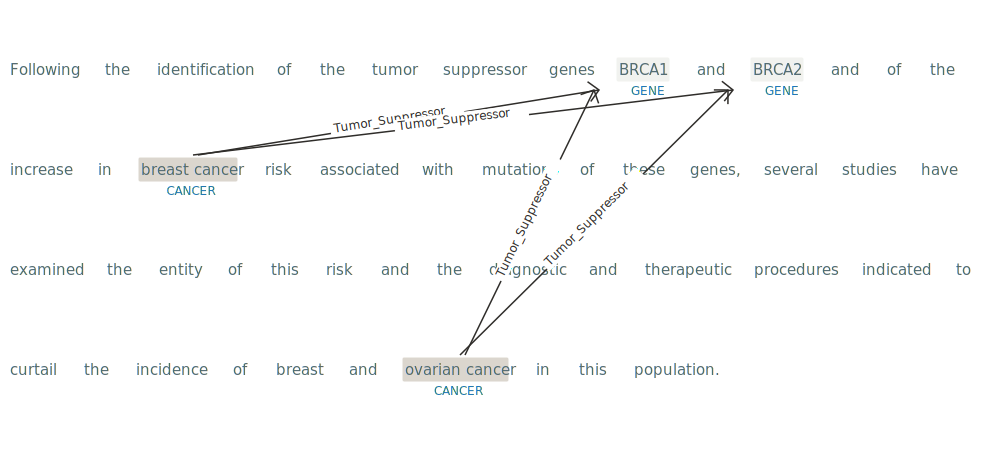

In [21]:

from IPython.display import Image, display, SVG

# display the downloaded svg file
display(SVG(filename=svg_path))


## Step 5: Connecting to Neo4j

Set up the connection to your Neo4j database:

[to learn creating a neo4j sandbox please click.](https://www.youtube.com/watch?v=OSk1ePl2PUM)

**[Neo4j Sandbox](https://neo4j.com/sandbox/)**

After create the neo4j sandbox, you will get your credentials. Please use your credentials to login neo4j browser.

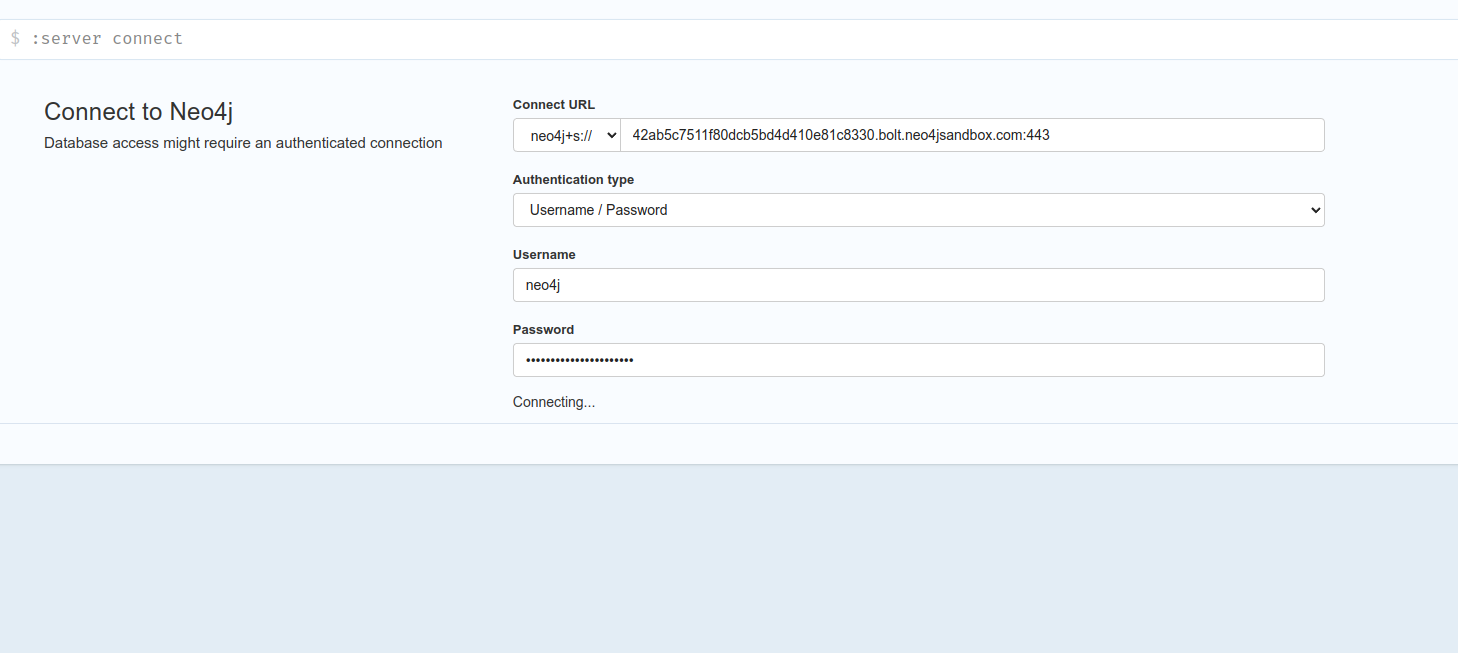

**After login neo4j browser please copy paste url that starts with "bolt"**

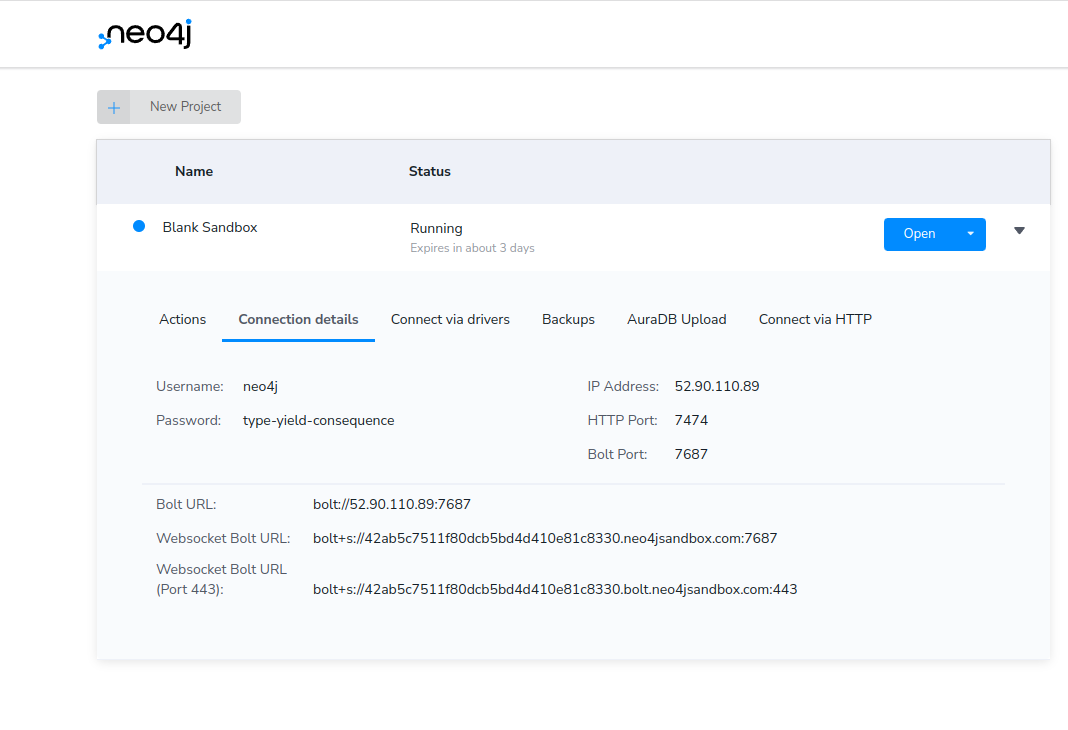

In [ ]:
from aimped.nlp.relation import Neo4j

uri = "bolt://52.90.110.89:7687"
user = "neo4j"
pwd = "type-yield-consequence"

neo4j_instance = Neo4j(uri, user=user, pwd=pwd, db="neo4j")

Connection Successful!


## Step 6: Creating Neo4j Queries

Generate Neo4j queries from the API result to write model output to the neo4j database:

In [ ]:
queries = neo4j_instance.create_neo4j_query(json_output=result)

Queries Created!


In [ ]:
for query in queries:
    print(query)


                MERGE (e1:gene {name: 'BRCA1'})
                MERGE (e2:cancer {name: 'breast cancer'})
                MERGE (e1)-[:Tumor_Suppressor]->(e2)
                

                MERGE (e1:gene {name: 'BRCA1'})
                MERGE (e2:cancer {name: 'ovarian cancer'})
                MERGE (e1)-[:Tumor_Suppressor]->(e2)
                

                MERGE (e1:gene {name: 'BRCA2'})
                MERGE (e2:cancer {name: 'breast cancer'})
                MERGE (e1)-[:Tumor_Suppressor]->(e2)
                

                MERGE (e1:gene {name: 'BRCA2'})
                MERGE (e2:cancer {name: 'ovarian cancer'})
                MERGE (e1)-[:Tumor_Suppressor]->(e2)
                


## Step 7: Writing Data to Neo4j

Execute the generated queries to write data to Neo4j:

In [ ]:
neo4j_instance.write_data(queries)

Writing data to Neo4j...
Data written successfully!


## Result

Please Check Your Neo4j Sandbox for Result

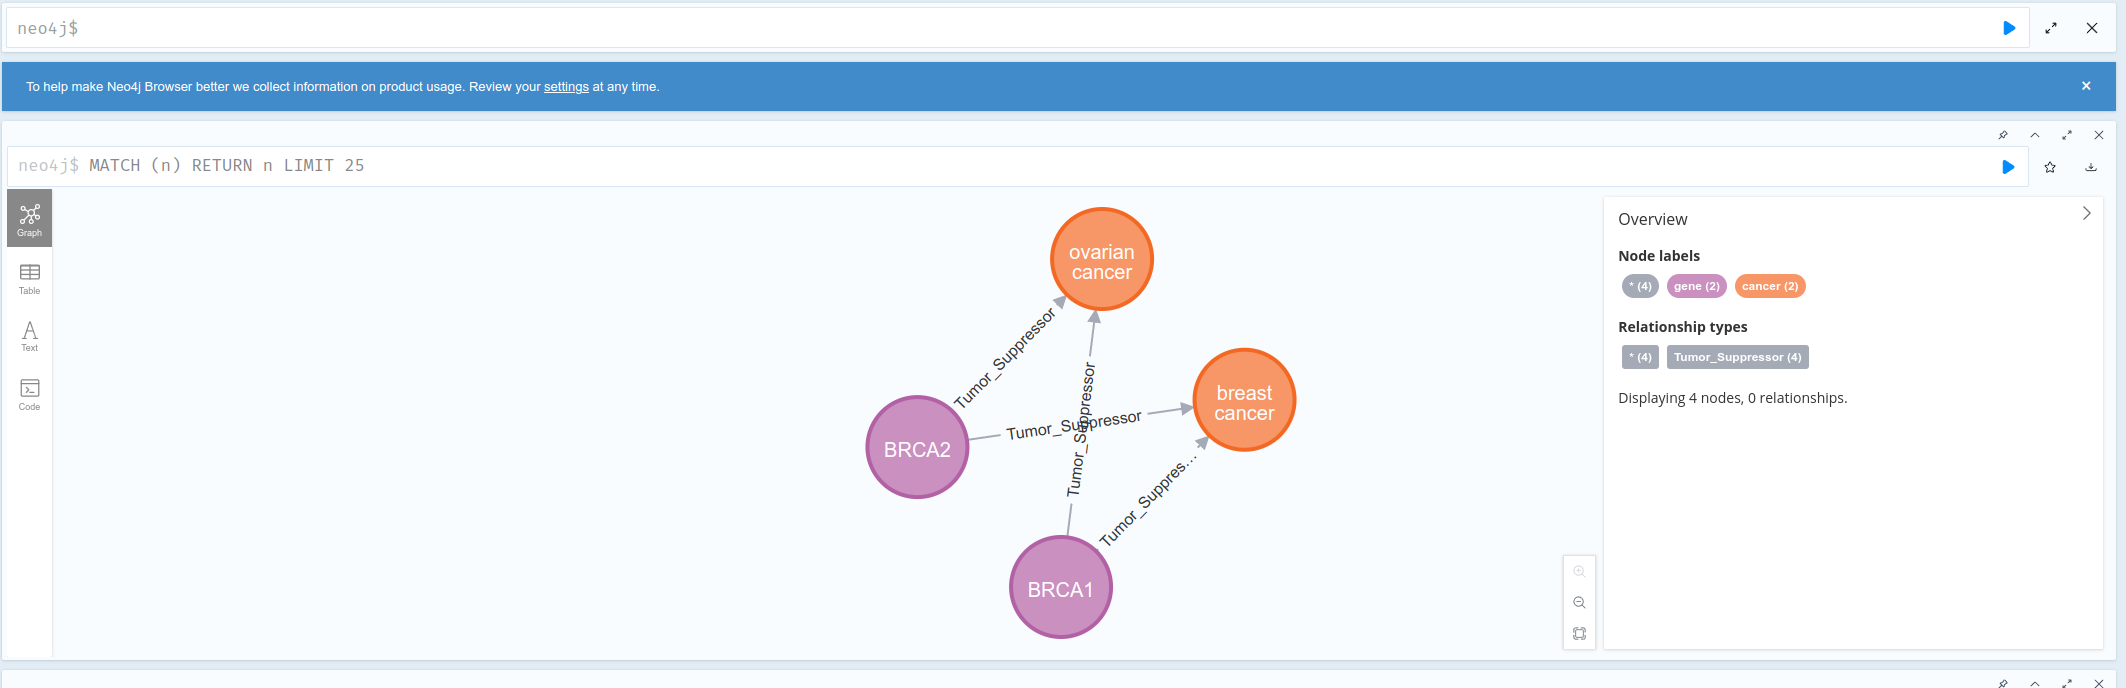